In [1]:
import pandas as pd
import plotly.express as px
import plotly.graph_objs as go
import numpy as np
import plotly
import matplotlib.pyplot as plt
import sys

!{sys.executable} -m pip install matplotlib2tikz

pd.set_option('display.max_rows', 1000)

# Note: updates country list to keep current sample

countries_tot = ['Austria', 'Belgium', 'Bosnia and Herzegovina', 'Bulgaria', 'Croatia',
                 'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France',
                 'Germany', 'Greece', 'Hungary', 'Ireland', 'Italy',
                 'Latvia', 'Lithuania', 'Luxembourg', 'Netherlands', 'Norway',
                 'Poland', 'Portugal', 'Romania', 'Serbia', 'Slovakia', 
                 'Spain', 'Slovenia', 'Sweden', 'Switzerland', 'United Kingdom']
len(countries_tot)


30

In [2]:
df_npi = pd.read_csv('https://raw.githubusercontent.com/OxCGRT/covid-policy-tracker/master/data/OxCGRT_latest.csv')

df_npi.rename(columns = {'Date':'date'}, inplace = True)

#df_npi['CountryName'] = df_npi['CountryName'].str.lower()

df_npi = df_npi.replace({'Slovak Republic' : 'Slovakia', "Czechia" : "Czech Republic" },regex=True)

df_npi.date = df_npi.date.apply(lambda x: str(x)[:4] +'-'+str(x)[4:6]+'-'+str(x)[6:8])

df_npi['RegionName'] = df_npi['RegionName'].fillna('')
df_npi = df_npi.drop(df_npi.loc[df_npi['RegionName']!=''].index)

df_npi = df_npi.drop(columns=['CountryCode', 'RegionName', 'RegionCode','Jurisdiction'])

df_npi = df_npi[df_npi['CountryName'].isin(countries_tot)]

display(df_npi['CountryName'].value_counts(sort=True))
df_npi['CountryName'].nunique()

C:\Users\ngolenvaux\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (2,3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Latvia                    482
Slovenia                  482
Ireland                   482
Lithuania                 482
Germany                   482
Belgium                   482
Portugal                  482
Hungary                   482
Sweden                    482
Slovakia                  482
Denmark                   482
Estonia                   482
Italy                     482
Bosnia and Herzegovina    482
Norway                    482
Spain                     482
Romania                   482
Switzerland               482
Luxembourg                482
Netherlands               482
Greece                    482
Poland                    482
Bulgaria                  482
Serbia                    482
United Kingdom            482
France                    482
Austria                   482
Croatia                   482
Finland                   482
Czech Republic            482
Name: CountryName, dtype: int64

30

In [3]:
df_owid = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv')

df_owid = df_owid.replace({'Slovak Republic' : 'Slovakia', "Czechia" : "Czech Republic" },regex=True)

df_owid = df_owid[df_owid['location'].isin(countries_tot)]
df_owid = df_owid[['location', 'date', 'new_cases_per_million','new_cases_smoothed_per_million',
                   'new_deaths_per_million','new_deaths_smoothed_per_million','population', 'population_density',
                   'total_cases_per_million','total_deaths_per_million','gdp_per_capita']]

df_owid['location'].nunique()

30

In [4]:
df_owid = pd.merge(df_owid, df_npi, how='left', left_on=['date','location'], 
              right_on=['date','CountryName']).drop(columns= ['CountryName']) 
df_owid = df_owid[df_owid.date >= '2020-02-29']
df_owid = df_owid[df_owid.date <= '2021-02-28']
df_owid = df_owid.fillna(0.0)

df_owid.rename(columns={"location": "CountryName"}, inplace=True)


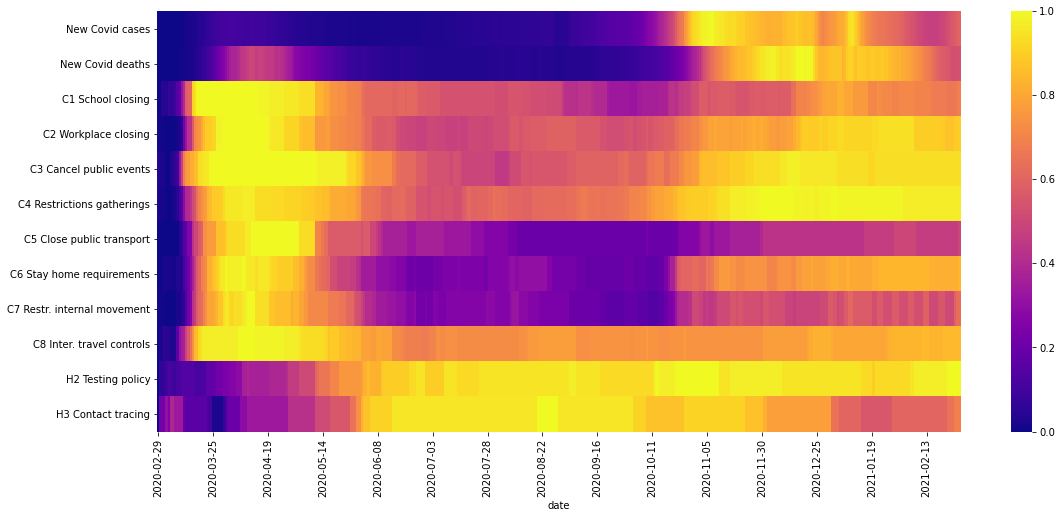

In [5]:
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

cols = ['new_cases_smoothed_per_million',
 'new_deaths_smoothed_per_million',
 'C1_School closing',
 'C2_Workplace closing',
 'C3_Cancel public events',
 'C4_Restrictions on gatherings',
 'C5_Close public transport',
 'C6_Stay at home requirements',
 'C7_Restrictions on internal movement',
 'C8_International travel controls',
 'H2_Testing policy',
 'H3_Contact tracing']

labels= ['New Covid cases',
 'New Covid deaths',
 'C1 School closing',
 'C2 Workplace closing',
 'C3 Cancel public events',
 'C4 Restrictions gatherings',
 'C5 Close public transport',
 'C6 Stay home requirements',
 'C7 Restr. internal movement',
 'C8 Inter. travel controls',
 'H2 Testing policy',
 'H3 Contact tracing']

df_owid_date = df_owid.drop(columns={'CountryName'}).groupby(['date']).mean()[cols]
df_owid_country = df_owid.drop(columns={'date'}).groupby(['CountryName']).mean()[cols]
df_owid_date = pd.DataFrame(MinMaxScaler().fit_transform(df_owid_date.values).transpose(),index=df_owid_date.columns,columns=df_owid_date.index)
df_owid_country = pd.DataFrame(MinMaxScaler().fit_transform(df_owid_country.values).transpose(),index=df_owid_country.columns,columns=df_owid_country.index)
plt.figure(figsize=(18,8))
plt.gcf().subplots_adjust(bottom=0.15)


ax = sns.heatmap(df_owid_date,cmap='plasma',xticklabels=25)
ax.set_yticklabels(labels)
plt.savefig('../output/NPIs.pdf'); 


In [6]:
df_owid['new_cases_smoothed_per_million'] = df_owid['new_cases_smoothed_per_million'].transform(lambda x: (x - x.min())/ (x.max() - x.min()))
df_owid['new_deaths_smoothed_per_million'] = df_owid['new_deaths_smoothed_per_million'].transform(lambda x: (x - x.min())/ (x.max() - x.min()))
